In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
from keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img,ImageDataGenerator

In [2]:
data_name = '1805/180820'
target_dir = '1805/180802'

In [3]:
model = load_model(f'D:/whale/data/{data_name}/model/my_model.h5')    

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        1

In [5]:
img_list = glob.glob(f'D:/whale/data/{target_dir}/fig/*.jpg')
target_list = []

for i in range(len(img_list)):
    img_path = load_img(img_list[i], target_size=(128,128))
    img_array = img_to_array(img_path)
    img = img_to_array(img_array)/255
    img = img[None,]
    target_list.append(img)

In [6]:
labels = []
with open(f'D:/whale/data/{data_name}/model/labels.txt', 'r', encoding='utf=8') as f:
    for line in f:
        line = line.rstrip()
        labels.append(line)

result = [0]*len(labels)
        
for target in target_list:
    pred = model.predict(target, batch_size=1)
    score = np.max(pred)
    pred_label = labels[np.argmax(pred[0])]
    result[int(pred_label)] += 1

In [7]:
result

[146, 285, 555, 1217, 811]

<BarContainer object of 5 artists>

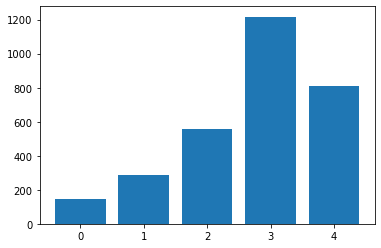

In [8]:
plt.bar(labels,result)